<a href="https://colab.research.google.com/github/hamant-jagwan/Bike_Sharing_Demand_Prediction--ML-regression/blob/main/Capstone_project_ML_Bike_sharing_demand_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - Regression
##### **Contribution**    - Individual

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crutial part is the prediction of bike count required at each hour for the stable supply of rental bikes

# **Know Your Data**

### Import Libraries

In [51]:
# Import Libraries
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingRegressor

%matplotlib inline
#suppress all warnings
import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [52]:
# Load Dataset
data = 'https://raw.githubusercontent.com/hamant-jagwan/Bike_Sharing_Demand_Prediction--ML-regression/main/Bike_Sharing_demand_prediction.csv'
bike_df = pd.read_csv(data, encoding= 'ISO-8859-1')

### Dataset First View

In [53]:
# Dataset First Look
bike_df.head(10)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


### Dataset Rows & Columns count

In [54]:
# Dataset Rows & Columns count
bike_df.shape

(8760, 14)

### Dataset Information

In [55]:
# Dataset Info
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values, Missing Values/Null Values, Unique value

In [56]:
# Dataset Duplicate Value Count
# This user define function will give the type,count of null and non null values as well as null ratio
def bike_info():
  temp=pd.DataFrame(index=bike_df.columns)
  temp["datatype"]=bike_df.dtypes
  temp["not null values"]=bike_df.count()
  temp["null value"]=bike_df.isnull().sum()
  temp["% of null value"]=bike_df.isnull().mean()*100
  temp["unique count"]=bike_df.nunique() # Return Series with number of distinct elements. Can ignore NaN values.
  return temp
bike_info()

,datatype,not null values,null value,% of null value,unique count
Date,object,8760,0,0.0,365
Rented Bike Count,int64,8760,0,0.0,2166
Hour,int64,8760,0,0.0,24
Temperature(°C),float64,8760,0,0.0,546
Humidity(%),int64,8760,0,0.0,90
Wind speed (m/s),float64,8760,0,0.0,65
Visibility (10m),int64,8760,0,0.0,1789
Dew point temperature(°C),float64,8760,0,0.0,556
Solar Radiation (MJ/m2),float64,8760,0,0.0,345
Rainfall(mm),float64,8760,0,0.0,61


<Axes: >

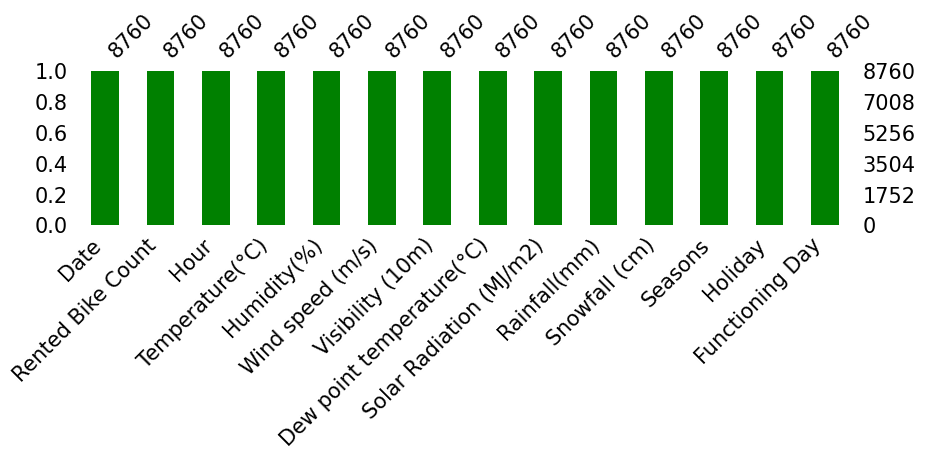

In [57]:
# Visualizing the missing values
import missingno as msno
msno.bar(bike_df, color='green',sort='ascending', figsize=(10,2), fontsize=15)

<Axes: >

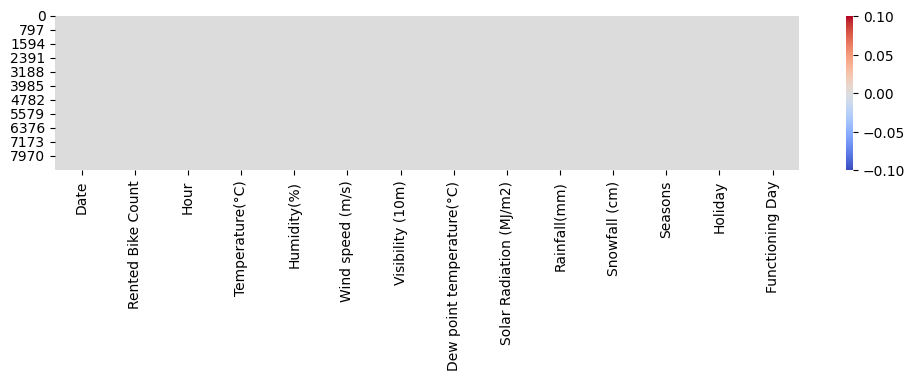

In [58]:
# Visualizing the missing values using Heatmap
plt.figure(figsize=(12,2))
sns.heatmap(bike_df.isna(), cmap = 'coolwarm')

**observation**

We don't have any missing and duplicate values in the dataset.

In [59]:
# Dataset Describe
bike_df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,8760,365,01/12/2017,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rented Bike Count,8760.0,NaN,NaN,NaN,704.602055,644.997468,0.0,191.0,504.5,1065.25,3556.0
Hour,8760.0,NaN,NaN,NaN,11.5,6.922582,0.0,5.75,11.5,17.25,23.0
Temperature(°C),8760.0,NaN,NaN,NaN,12.882922,11.944825,-17.8,3.5,13.7,22.5,39.4
Humidity(%),8760.0,NaN,NaN,NaN,58.226256,20.362413,0.0,42.0,57.0,74.0,98.0
Wind speed (m/s),8760.0,NaN,NaN,NaN,1.724909,1.0363,0.0,0.9,1.5,2.3,7.4
Visibility (10m),8760.0,NaN,NaN,NaN,1436.825799,608.298712,27.0,940.0,1698.0,2000.0,2000.0
Dew point temperature(°C),8760.0,NaN,NaN,NaN,4.073813,13.060369,-30.6,-4.7,5.1,14.8,27.2
Solar Radiation (MJ/m2),8760.0,NaN,NaN,NaN,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8760.0,NaN,NaN,NaN,0.148687,1.128193,0.0,0.0,0.0,0.0,35.0


### Variables Description 

The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.
Features Information:
* Date : year-month-day
* Rented Bike count - Count of bikes rented at each hour
* Hour - Hour of the day
* Temperature- Temperature in Celsius
* Humidity - %
* Windspeed - m/s
* Visibility - 10m
* Dew point temperature - Celsius
* Solar radiation - MJ/m2
* Rainfall - mm
* Snowfall - cm
* Seasons - Winter, Spring, Summer, Autumn
* Holiday - Holiday/No holiday
* Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

**Observations:**
1. We are focusing on several key columns of our dataset, including 'Hour', 'Holiday', 'Functioning Day', 'Rented Bike Count', 'Temperature(°C)', and 'Seasons', as they contain a wealth of information.
2. By utilizing these features, we plan to create a regression model and implement various regression algorithms.
3. There is a column 'Hour' which might be considered a categorical feature or maybe a numerical feature based on the data we will try both and see the result difference.

# ***EDA***

### Creating Some New Features

In [60]:
# Renaming complex columns name for the sake of simplicity   
bike_df=bike_df.rename(columns={'Rented Bike Count':'rented_bike_count',
                                'Date':'date',
                                'Hour':'hour',
                                'Seasons':'seasons',
                                'Holiday':'holiday',
                                'Temperature(°C)':'temperature',
                                'Humidity(%)':'humidity',
                                'Wind speed (m/s)':'wind_speed',
                                'Visibility (10m)':'visibility',
                                'Dew point temperature(°C)':'dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'solar_radiation',
                                'Rainfall(mm)':'rainfall',
                                'Snowfall (cm)':'snowfall',
                                'Functioning Day':'functioning_day'})

In [61]:
# Splitting Date into year, month, day & day_name
bike_df.date = pd.to_datetime(bike_df.date)

bike_df['day'] = bike_df['date'].dt.day
bike_df['month'] = bike_df['date'].dt.month
bike_df['year'] = bike_df['date'].dt.year
bike_df['weekday'] = bike_df['date'].dt.day_name()

# droping Date column
bike_df.drop('date', axis=1, inplace=True)

In [62]:
bike_df.hour.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

The hours of the day follow a clear sequence, with 9 am being closer to 10 am than it is to 8 am, and farther from 6 pm. This feature can be classified as a discrete ordinal variable. We will consider the hour as a categorical value and transform it into a numerical value to see if there is any difference in the results.

In [63]:
def session(x):
   
    ''' 
    For exploratory data analysis (EDA) purposes, the "Hour" column can be converted into categorical variables
    such as "Morning", "Noon", and "Night", without altering the existing label encoding format of the "Hour" column. 
    This conversion is not necessary for model training.
    '''
    
    if x>4 and x<=8:
        return 'Early Morning'
    elif x>8 and x<=12:
        return 'Morning'
    elif x>12 and x<=16:
        return 'Afternoon'
    elif x>16 and x<=20:
        return 'Evening'
    elif x>20 and x<=24:
        return 'Night'
    elif x<=4:
        return 'Late Night'

#apply funtion to make new category column
bike_df['session'] = bike_df['hour'].apply(session)

### Column: `rented_bike_count`

In [64]:
print(f'Min Count: {bike_df.rented_bike_count.min()}')
print(f'Max Count: {bike_df.rented_bike_count.max()}')

Min Count: 0
Max Count: 3556


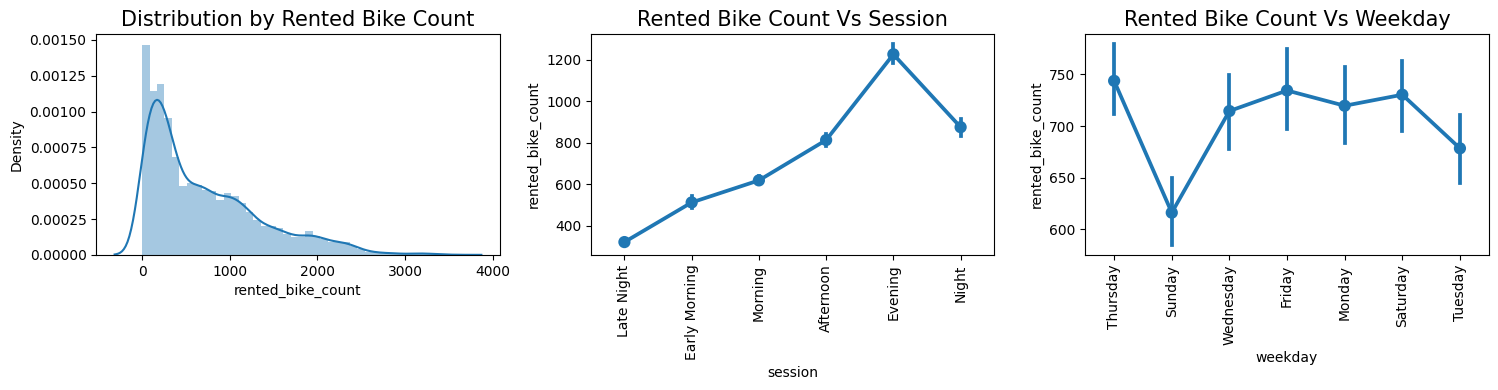

In [65]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

# Distribution analysis
dist = sns.distplot(bike_df['rented_bike_count'], ax=ax[0])
dist.set_title('Distribution by Rented Bike Count', size=15)

# Bi-variate analysis
# Rented Bike Count Vs Session
point = sns.pointplot(data=bike_df, x='session', y='rented_bike_count', ax=ax[1])
point.set_title('Rented Bike Count Vs Session', size=15)
# Set x-ticks rotation to 90 degrees
point.set_xticklabels(point.get_xticklabels(), rotation=90)

# Bi-variate analysis
# Rented Bike Count Vs Weekday
point = sns.pointplot(data=bike_df, x='weekday', y='rented_bike_count', ax=ax[2])
point.set_title('Rented Bike Count Vs Weekday', size=15)
# Set x-ticks rotation to 90 degrees
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Observation:

* Distribution of Rented Bike Count is positively skewed and has many outliers. We will treat it later.
* Demand for rented bikes increases in the evening.
* There is the least demand for the rented bike on Sunday.

4.3 Column: `hour`

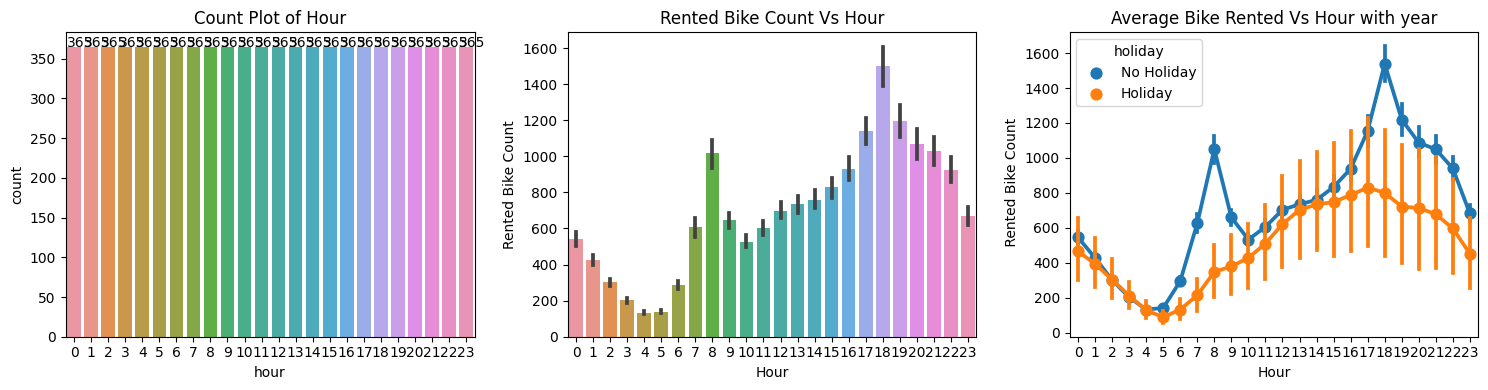

In [66]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

# Univariate analysis
count = sns.countplot(data=bike_df, x='hour', ax=ax[0])
count.set_title('Count Plot of Hour')

# adding value count on the top of bar
for p in count.patches:
    count.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

# Bi-variate analysis 
# Rented Bike Count Vs Hour
bar = sns.barplot(data=bike_df, x='hour', y='rented_bike_count', ax = ax[1])
bar.set(xlabel='Hour', ylabel='Rented Bike Count', title='Rented Bike Count Vs Hour')

# Multi-variate analysis
point = sns.pointplot(data=bike_df, x='hour', y='rented_bike_count', hue='holiday', ax= ax[2])
point.set(xlabel='Hour', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Hour with year')

plt.tight_layout()
plt.show()

Observation:

* Every hour has an equal number of counts in the dataset.
Demand for rented bike count is higher at 8 AM and 6 PM indicating a high demand during business hours.
* Rented Bike Count follows 2 patterns one for holiday and another for no holiday.
* Holiday: The first pattern is where there is a peak in the rentals at around 8 am and another at around 6 pm. These correspond to local bikers who typically go to work on a working day, Monday to Friday.
* Non-Working Day: Second pattern where there are more or less uniform rentals across the day with a peak at around noon time. These correspond to probable tourists who typically are casual users who rent/drop off bikes uniformly during the day and tour the city on nonworking days which typically are Saturday and Sunday

### Column: `temperature`

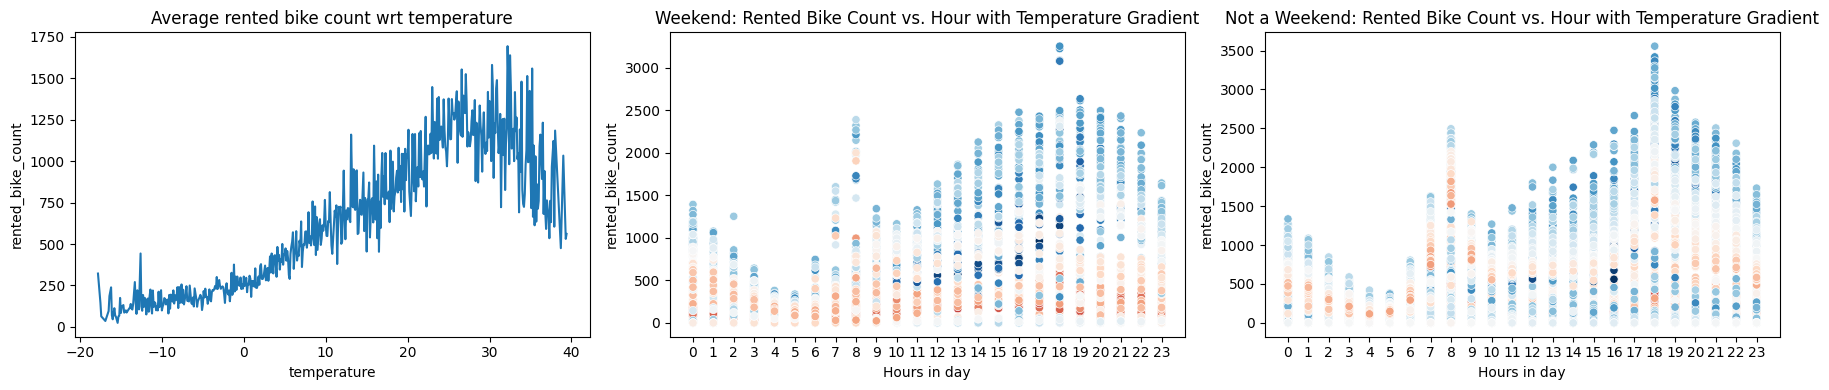

In [67]:

fig,ax = plt.subplots(1,3, figsize=(18,4))

# Univariate analysis
# Dependent Column Value Vs temperature
# group temperature column
temp_wrt_bike_rent_count = bike_df.groupby(['temperature'])['rented_bike_count'].mean().reset_index()

line = sns.lineplot(x = 'temperature', y ='rented_bike_count', data = temp_wrt_bike_rent_count, ax = ax[0])
line.set_title('Average rented bike count wrt temperature')

# Multi-variate analysis
# Dependent Column Value Vs hour with temperature
bike_df_nw = bike_df[(bike_df.weekday != 'Saturday') & (bike_df.weekday != 'Sunday')]
bike_df_w = bike_df[(bike_df.weekday == 'Saturday') | (bike_df.weekday == 'Sunday')]

# Weekend
scatter2 = sns.scatterplot(x=bike_df_w.hour, y=bike_df_w['rented_bike_count'], c=bike_df_w.temperature, cmap="RdBu", ax =ax[1])
scatter2.set(xticks = range(24), xlabel='Hours in day', ylabel='rented_bike_count')
scatter2.set_title('Weekend: Rented Bike Count vs. Hour with Temperature Gradient')

# Not a Weekend
scatter = sns.scatterplot(x=bike_df_nw.hour, y=bike_df_nw['rented_bike_count'], c=bike_df_nw.temperature,cmap="RdBu", ax = ax[2])
scatter.set(xticks = range(24), xlabel='Hours in day', ylabel='rented_bike_count')
scatter.set_title('Not a Weekend: Rented Bike Count vs. Hour with Temperature Gradient')


plt.tight_layout()
plt.show()

Observation:

* We can see from the line plot above that the average number of bikes rented with temperature increases steadily, with a slight decrease at the highest temperature.
* People prefer renting bikes in warm environments. Therefore, the demand for bicycles is high if the temperature is sufficiently warm, but extremely hot temperatures are also unsuitable for bike demand.
* However, there is a slight decrease in count if the temperature is too high (the darkest of the blue dots).

### Column: `humidity`

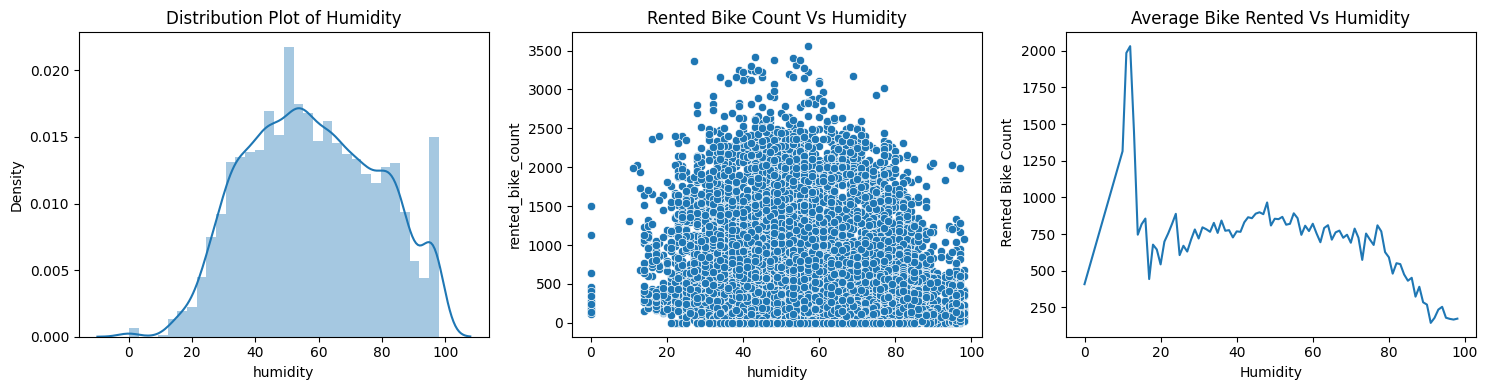

In [68]:

fig,ax = plt.subplots(1,3, figsize=(15,4))

# Univariate analysis
dist = sns.distplot(bike_df.humidity, ax = ax[0])
dist.set_title('Distribution Plot of Humidity')

# Bi-variate analysis 
# Rented Bike Count Vs Humidity
scatter = sns.scatterplot(data=bike_df, x='humidity', y='rented_bike_count', ax = ax[1])
scatter.set(xlabel='humidity', ylabel='rented_bike_count', title='Rented Bike Count Vs Humidity')

# Line Plot
group_wind_speed = bike_df.groupby(['humidity'])['rented_bike_count'].mean().reset_index()
line = sns.lineplot(data=group_wind_speed, x='humidity', y = 'rented_bike_count', ax= ax[2])
line.set(xlabel='Humidity', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Humidity')

plt.tight_layout()
plt.show()

Observation:

* We can see from the plots above that the average number of bikes rented goes up and down sharply with the peak at around 50. For the number of rented bikes in demand, the most preferred humid environment is 20-90.

 ### Column: `wind_speed`

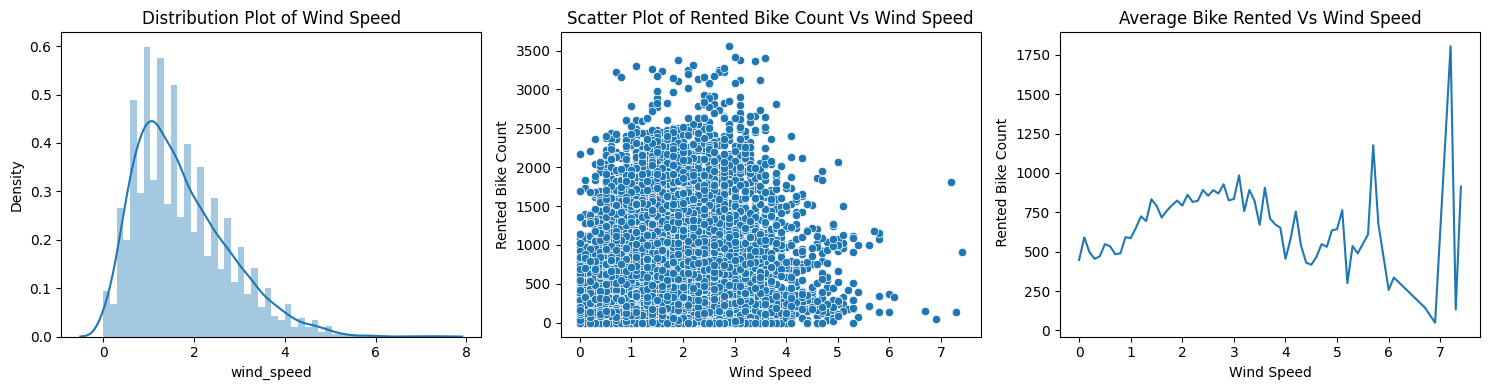

In [69]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

# Univariate analysis
dist = sns.distplot(bike_df.wind_speed, ax = ax[0])
dist.set_title('Distribution Plot of Wind Speed')

# Bi-variate analysis 
# Rented Bike Count Vs Wind Speed
scatter = sns.scatterplot(data=bike_df, x='wind_speed', y='rented_bike_count', ax = ax[1])
scatter.set(xlabel='Wind Speed', ylabel='Rented Bike Count', title='Scatter Plot of Rented Bike Count Vs Wind Speed')

# Line Plot
group_wind_speed = bike_df.groupby(['wind_speed'])['rented_bike_count'].mean().reset_index()
line = sns.lineplot(data=group_wind_speed, x='wind_speed', y = 'rented_bike_count', ax= ax[2])
line.set(xlabel='Wind Speed', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Wind Speed')

plt.tight_layout()
plt.show()

Observation:

* We can see from the distribution plot that wind speed is slightly positively skewed.
* Scatter Plot tells us about the distribution of the wind speed and rented bike count, and how the values of the two variables are related to each other.
* Line plot tells us that people prefer moderate wind but there is a spike at wind speed 7.

### Column: `visibility`

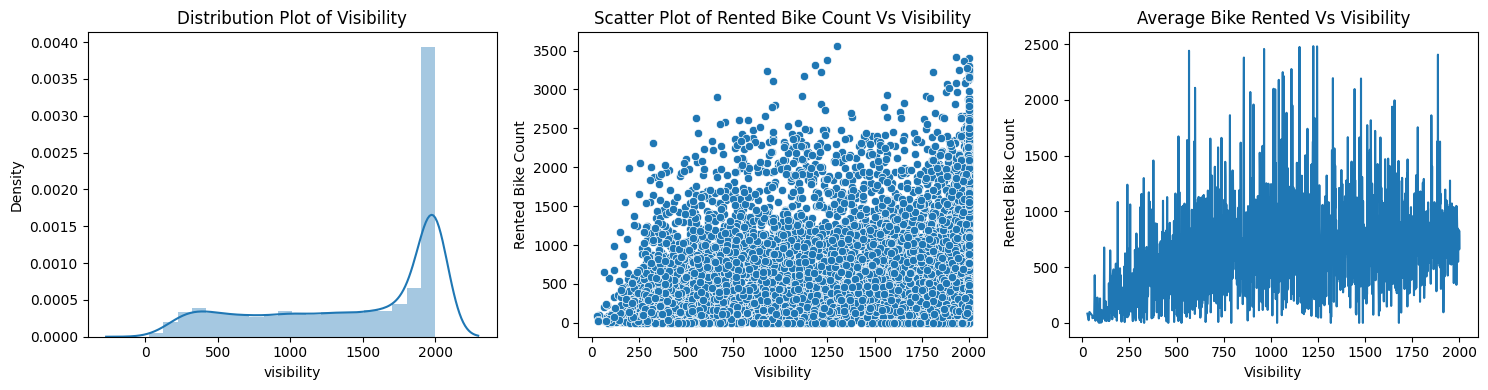

In [70]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

# Univariate analysis
dist = sns.distplot(bike_df.visibility, ax = ax[0])
dist.set_title('Distribution Plot of Visibility')

# Bi-variate analysis 
# Rented Bike Count Vs Visibility
scatter = sns.scatterplot(data=bike_df, x='visibility', y='rented_bike_count', ax = ax[1])
scatter.set(xlabel='Visibility', ylabel='Rented Bike Count', title='Scatter Plot of Rented Bike Count Vs Visibility')

# Line Plot
group_visibility = bike_df.groupby(['visibility'])['rented_bike_count'].mean().reset_index()
line = sns.lineplot(data=group_visibility, x='visibility', y = 'rented_bike_count', ax= ax[2])
line.set(xlabel='Visibility', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Visibility')

plt.tight_layout()
plt.show()


Observation:

* Visibility is highly skewed to the left side.
* We can see from these plots above that as visibility rises, so does rented_bike_count.

### Column: `dew_point_temperature`

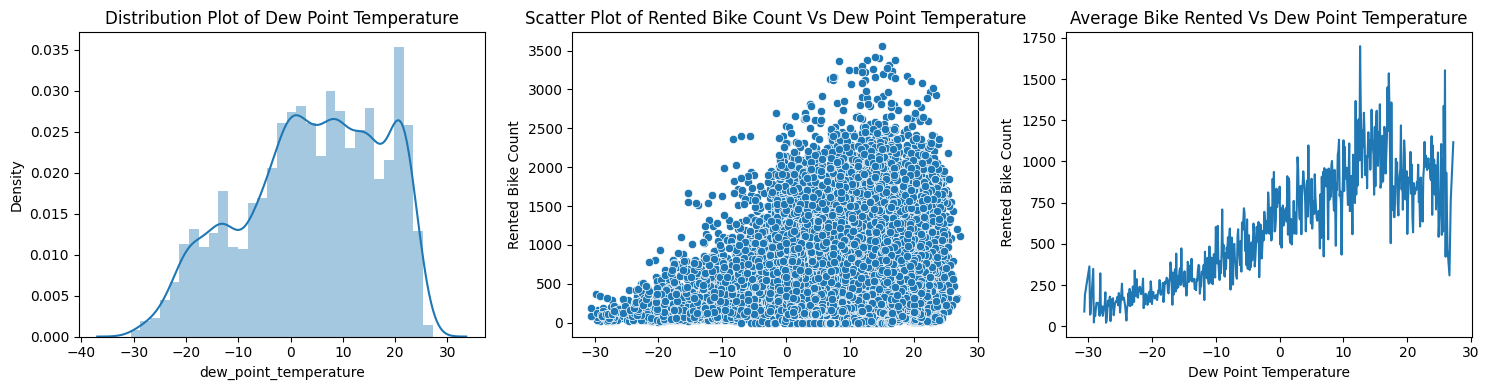

In [71]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

# Univariate analysis
dist = sns.distplot(bike_df.dew_point_temperature, ax = ax[0])
dist.set_title('Distribution Plot of Dew Point Temperature')

# Bi-variate analysis 
# Rented Bike Count Vs Dew Point Temperature
scatter = sns.scatterplot(data=bike_df, x='dew_point_temperature', y='rented_bike_count', ax = ax[1])
scatter.set(xlabel='Dew Point Temperature', ylabel='Rented Bike Count', title='Scatter Plot of Rented Bike Count Vs Dew Point Temperature')

# Line Plot
group_dew_point_temperature = bike_df.groupby(['dew_point_temperature'])['rented_bike_count'].mean().reset_index()
line = sns.lineplot(data = group_dew_point_temperature, x ='dew_point_temperature', y = 'rented_bike_count', ax= ax[2])
line.set(xlabel='Dew Point Temperature', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Dew Point Temperature')

plt.tight_layout()
plt.show()

Observation:

* We can see from the above plots that dew point temperature is negatively skewed with a clear positive relationship with rented bike count.
* The average number of bikes rented with dew point temperature increases steadily, with a slight decrease at the highest dew point temperature.
* Line plot of dew point temperature is very similar to temperature patter

### Column :  `solar_radiation`

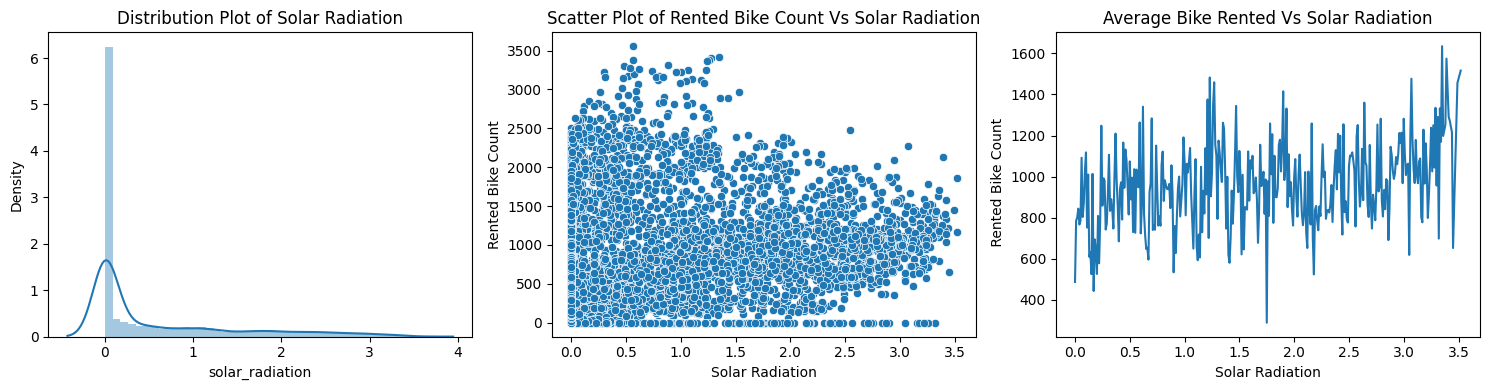

In [79]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

# Univariate analysis
dist = sns.distplot(bike_df.solar_radiation, ax = ax[0] )
dist.set_title('Distribution Plot of Solar Radiation')

# Bi-variate analysis 
# Rented Bike Count Vs Solar Radiation
scatter = sns.scatterplot(data=bike_df, x='solar_radiation', y='rented_bike_count', ax = ax[1])
scatter.set(xlabel='Solar Radiation', ylabel='Rented Bike Count', title='Scatter Plot of Rented Bike Count Vs Solar Radiation')

# Line Plot
group_solar_radiation = bike_df.groupby(['solar_radiation'])['rented_bike_count'].mean().reset_index()
line = sns.lineplot(data = group_solar_radiation, x ='solar_radiation', y = 'rented_bike_count', ax= ax[2])
line.set(xlabel='Solar Radiation', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Solar Radiation')

plt.tight_layout()
plt.show()

Observation:

* We can see from the distribution plot that solar radiation is highly skewed to positive.
* The average number of bikes rented goes up with solar radiation.
* Additionally, this column is directly related to the temperature column.

### Column: `rainfall`

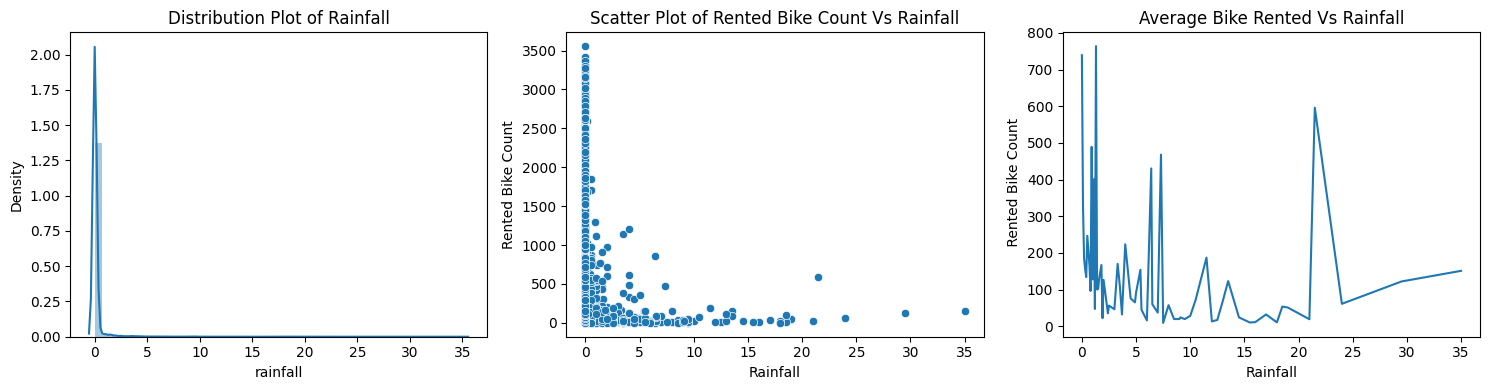

In [82]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

# Univariate analysis
dist = sns.distplot(bike_df.rainfall, ax = ax[0])
dist.set_title('Distribution Plot of Rainfall')

# Bi-variate analysis 
# Rented Bike Count Vs Rainfall
scatter = sns.scatterplot(data=bike_df, x='rainfall', y='rented_bike_count', ax = ax[1])
scatter.set(xlabel='Rainfall', ylabel='Rented Bike Count', title='Scatter Plot of Rented Bike Count Vs Rainfall')

# Line Plot
group_rainfall = bike_df.groupby(['rainfall'])['rented_bike_count'].mean().reset_index()
line = sns.lineplot(data = group_rainfall, x ='rainfall', y = 'rented_bike_count', ax= ax[2])
line.set(xlabel='Rainfall', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Rainfall')

plt.tight_layout()
plt.show()

Observation:

* Distribution of rainfall is highly skewed to the positive side.
* People prefer almost no or very less rainfall.

### Column: `snowfall`

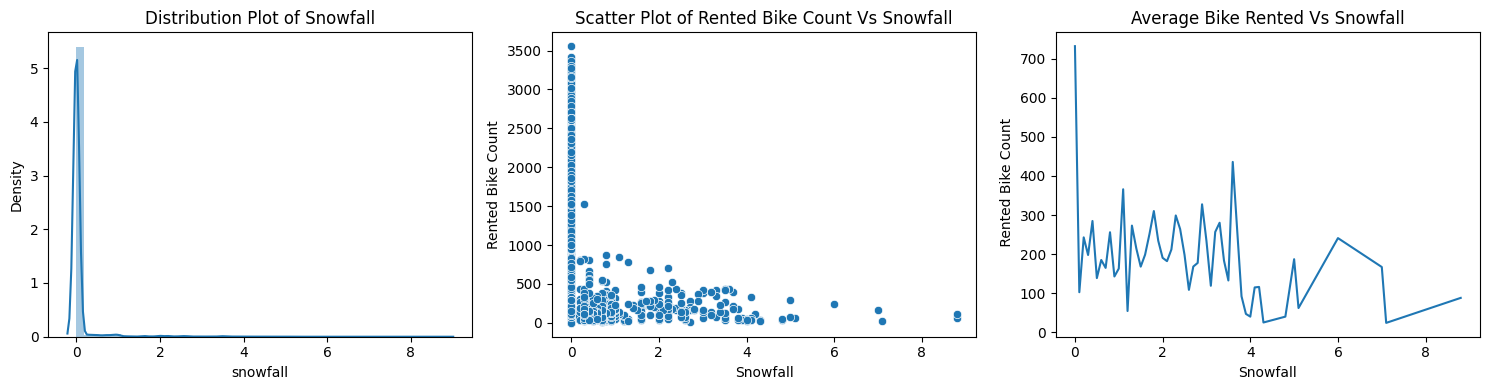

In [86]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

# Univariate analysis
dist = sns.distplot(bike_df.snowfall, ax = ax[0])
dist.set_title('Distribution Plot of Snowfall')

# Bi-variate analysis 
# Rented Bike Count Vs Snowfall
scatter = sns.scatterplot(data=bike_df, x='snowfall', y='rented_bike_count', ax = ax[1])
scatter.set(xlabel='Snowfall', ylabel='Rented Bike Count', title='Scatter Plot of Rented Bike Count Vs Snowfall')

# Line Plot
group_snowfall = bike_df.groupby(['snowfall'])['rented_bike_count'].mean().reset_index()
line = sns.lineplot(data = group_snowfall, x ='snowfall', y = 'rented_bike_count', ax= ax[2])
line.set(xlabel='Snowfall', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Snowfall')

plt.tight_layout()
plt.show()

Observation:

* Distribution of snowfall is highly skewed to the positive side.
* People prefer almost no or very less snowfall.

### Column: `seasons`

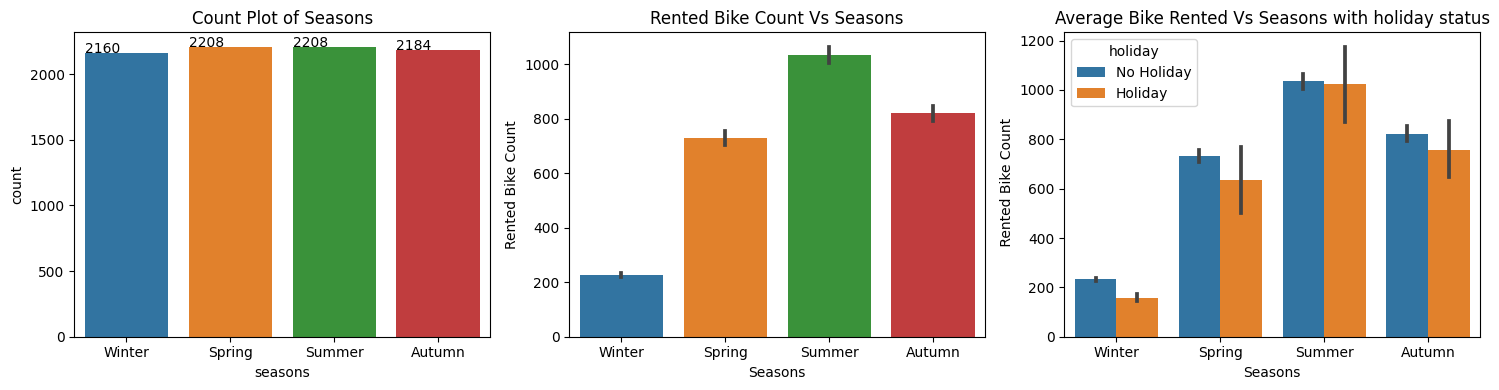

In [89]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

# Univariate analysis
count = sns.countplot(data=bike_df, x='seasons', ax=ax[0])
count.set_title('Count Plot of Seasons')

# adding value count on the top of bar
for p in count.patches:
    count.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

# Bi-variate analysis 
# Rented Bike Count Vs Seasons
bar = sns.barplot(data=bike_df, x='seasons', y='rented_bike_count', ax = ax[1])
bar.set(xlabel='Seasons', ylabel='Rented Bike Count', title='Rented Bike Count Vs Seasons')

# Multi-variate analysis
cat = sns.barplot(data=bike_df, x='seasons', y='rented_bike_count', hue='holiday', ax= ax[2])
cat.set(xlabel='Seasons', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Seasons with holiday status')

plt.tight_layout()
plt.show()

Observation:

* Dataset has 4 seasons and every season has more than 2000 counts.
* The most preferred season for the rented_bike_count is summer and the least preferred is winter which means that people prefer to rent bikes in warm temperatures.
* In every season on a no holiday rented_bike_count has more count than on a holiday.

### Column: `holiday`

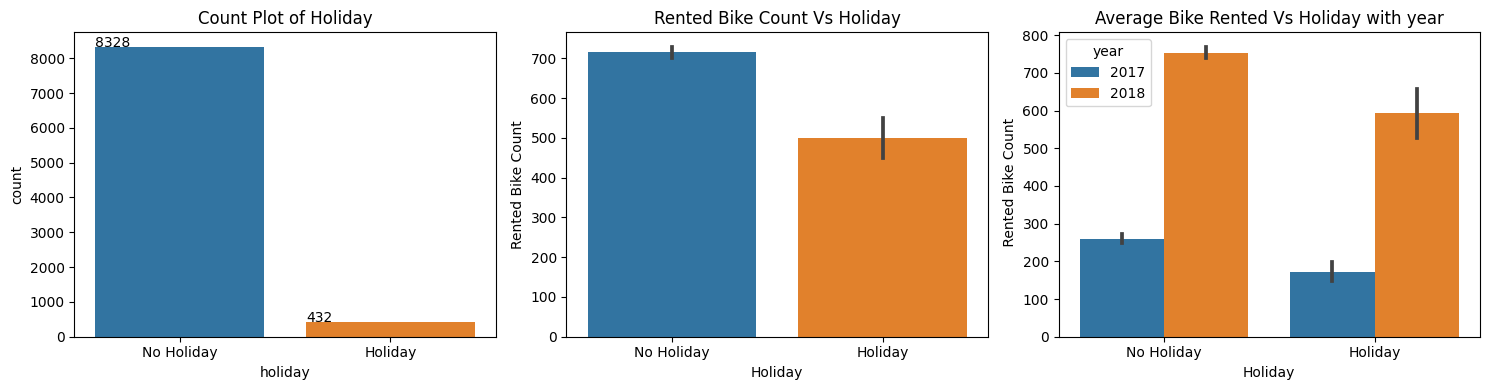

In [90]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

# Univariate analysis
count = sns.countplot(data=bike_df, x='holiday', ax=ax[0])
count.set_title('Count Plot of Holiday')

# adding value count on the top of bar
for p in count.patches:
    count.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

# Bi-variate analysis 
# Rented Bike Count Vs Holiday
bar = sns.barplot(data=bike_df, x='holiday', y='rented_bike_count', ax = ax[1])
bar.set(xlabel='Holiday', ylabel='Rented Bike Count', title='Rented Bike Count Vs Holiday')

# Multi-variate analysis
cat = sns.barplot(data=bike_df, x='holiday', y='rented_bike_count', hue='year', ax= ax[2])
cat.set(xlabel='Holiday', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Holiday with year')

plt.tight_layout()
plt.show()


Observation:

* Dataset has more records of No holiday than a holiday which is obvious as most of the days are working days.
* When there are no holidays, demand for bike sharing is higher than when there are holidays, indicating that business-related bike rentals are preferred.
* Dataset has more records of 2018 than 2017

### Column: `functioning_day`

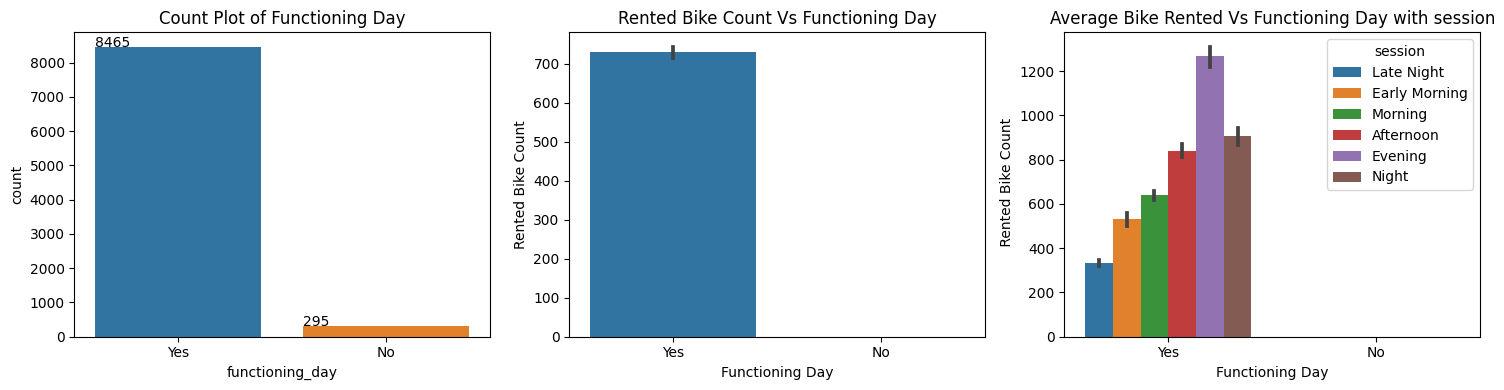

In [91]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

# Univariate analysis
count = sns.countplot(data=bike_df, x='functioning_day', ax=ax[0])
count.set_title('Count Plot of Functioning Day')

# adding value count on the top of bar
for p in count.patches:
    count.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

# Bi-variate analysis 
# Rented Bike Count Vs Functioning Day
bar = sns.barplot(data=bike_df, x='functioning_day', y='rented_bike_count', ax = ax[1])
bar.set(xlabel='Functioning Day', ylabel='Rented Bike Count', title='Rented Bike Count Vs Functioning Day')

# Multi-variate analysis
cat = sns.barplot(data=bike_df, x='functioning_day', y='rented_bike_count', hue='session', ax= ax[2])
cat.set(xlabel='Functioning Day', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Functioning Day with session')

plt.tight_layout()
plt.show()

Observation:

* Dataset has more records of Functioning Day than no functioning day which is obvious as most of the days are working days.
* Even though we have some counts of no functioning days still there is no bike rented on a no functioning day.
* On a functioning day, the evening session has the most rented bike count.

# **Data Cleaning**

What is data cleaning?

Data cleaning is the process of identifying and correcting or removing inaccuracies, inconsistencies, and missing values in a dataset. It is an important step in the data preparation process that ensures that the data is accurate, complete, and in a format that can be easily analyzed. Data cleaning may include tasks such as removing duplicate records, filling in missing values, correcting errors, and standardizing data formats. The goal of data cleaning is to improve the quality of the data and make it suitable for further analysis and modeling.

**Duplicate Values**

In [93]:
# counting duplicate values
bike_df.duplicated().sum()

0

### **Missing Values**

In [94]:
# Missing Values/Null Values Count
print(bike_df.isnull().sum())

rented_bike_count        0
hour                     0
temperature              0
humidity                 0
wind_speed               0
visibility               0
dew_point_temperature    0
solar_radiation          0
rainfall                 0
snowfall                 0
seasons                  0
holiday                  0
functioning_day          0
day                      0
month                    0
year                     0
weekday                  0
session                  0
dtype: int64


**Skewness**

In [95]:
# statistical summary
bike_df.describe().T

,count,mean,std,min,25%,50%,75%,max
rented_bike_count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
temperature,8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
humidity,8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
wind_speed,8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
visibility,8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
dew_point_temperature,8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
solar_radiation,8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
rainfall,8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
snowfall,8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


# **Feature Engineering & Data Pre-processing**

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

# **Model Building**

# ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***